# EXPLORATORY DATA ANALYSIS
We will explore the main variables of our data. We should use only train set for this purpose. The test set will be treated as a new, not seen before data, so it can't be used for exploration.

We will visualize data from the first 3 months - January, February and March.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
pd.set_option('mode.chained_assignment', None)
pd.options.display.max_columns = 100

In [3]:
data = pd.read_pickle('data.pkl')

In [4]:
train = data[data.MONTH <= 3]
del data

In [5]:
train.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,STATE_ORIGIN,LATITUDE_ORIGIN,LONGITUDE_ORIGIN,STATE_DESTINATION,LATITUDE_DESTINATION,LONGITUDE_DESTINATION,SCHEDULED_DEPARTURE_HH,DEPARTURE_TIME_HH,SCHEDULED_ARRIVAL_HH,WHEELS_OFF_HH,ARRIVAL_TIME_HH,ARRIVAL_TIME,DEPARTURE_TIME_NORMALIZED,ARRIVAL_TIME_NORMALIZED,ROUTE,ROUTE_STATES
0,1,1,4,AS,98,N407AS,ANC,SEA,2015-01-01 00:05:00,2014-12-31 23:54:00,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,-22.0,NaN,NaN,NaN,NaN,NaN,AK,61.17432,-149.99619,WA,47.44898,-122.30931,0,23,4,0,4,2015-01-01 04:08:00,2015-01-01 08:54:00,2015-01-01 12:08:00,ANC_SEA,AK_WA
1,1,1,4,AA,2336,N3KUAA,LAX,PBI,2015-01-01 00:10:00,2015-01-01 00:02:00,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,-9.0,NaN,NaN,NaN,NaN,NaN,CA,33.94254,-118.40807,FL,26.68316,-80.09559,0,0,7,0,7,2015-01-01 07:41:00,2015-01-01 08:02:00,2015-01-01 12:41:00,LAX_PBI,CA_FL
2,1,1,4,US,840,N171US,SFO,CLT,2015-01-01 00:20:00,2015-01-01 00:18:00,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,5.0,NaN,NaN,NaN,NaN,NaN,CA,37.61900,-122.37484,NC,35.21401,-80.94313,0,0,8,0,8,2015-01-01 08:11:00,2015-01-01 08:18:00,2015-01-01 13:11:00,SFO_CLT,CA_NC
3,1,1,4,AA,258,N3HYAA,LAX,MIA,2015-01-01 00:20:00,2015-01-01 00:15:00,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,-9.0,NaN,NaN,NaN,NaN,NaN,CA,33.94254,-118.40807,FL,25.79325,-80.29056,0,0,8,0,7,2015-01-01 07:56:00,2015-01-01 08:15:00,2015-01-01 12:56:00,LAX_MIA,CA_FL
4,1,1,4,AS,135,N527AS,SEA,ANC,2015-01-01 00:25:00,2015-01-01 00:24:00,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,-21.0,NaN,NaN,NaN,NaN,NaN,WA,47.44898,-122.30931,AK,61.17432,-149.99619,0,0,3,0,2,2015-01-01 02:59:00,2015-01-01 08:24:00,2015-01-01 11:59:00,SEA_ANC,WA_AK


Let's create a function that prints the describe function results with 0.1 and 0.9 percentiles and with two decimal places. We will use such functionality many times so it's more convenient to have it saved as a function

In [6]:
def describe(data):
    print(data.describe(percentiles = [.1, .25, .5, .75, .9]).round(2))

## ARRIVAL_DELAY

In [7]:
describe(train.ARRIVAL_DELAY)

count    1356814.00
mean           6.24
std           40.53
min          -87.00
10%          -20.00
25%          -12.00
50%           -3.00
75%           10.00
90%           39.00
max         1971.00
Name: ARRIVAL_DELAY, dtype: float64


50% values of ARRIVAL_DELAY are in the range from -12 to 10 minutes.

The interesting fact is that the majority of flights ends before the time (median is -3 minutes).
The mean of about 6 minutes and standard deviation reaching over 40 minutes indicate however that there are quite many outliers. The maximum value reaches 32 hours(!), whereas the minimum time before schedule is only about one hour and a half.

Let's visualize distribution of arrival delay on the graphs.

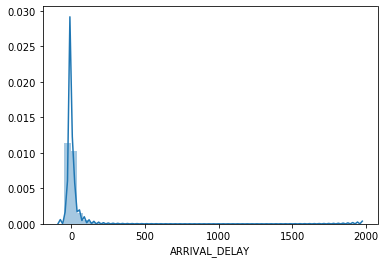

In [8]:
sns.distplot(train.ARRIVAL_DELAY)

There are many outliers so let's visualize additionally only flights with arrival delay less than 2 hours.

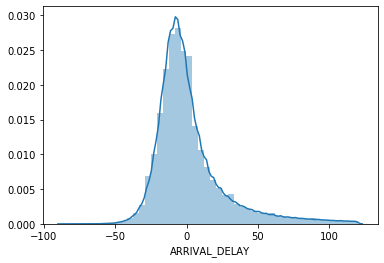

In [9]:
sns.distplot(train.loc[train.ARRIVAL_DELAY <= 120, 'ARRIVAL_DELAY'])

In [10]:
print('% of sooner arrivals:', round(len(train.loc[train.ARRIVAL_DELAY < 0, 'ARRIVAL_DELAY']) * 100 / len(train),2))

% of sooner arrivals: 57.3


Our data seem to be right-skewed.

Though the main area of delay values is between -12 to 10 minutes, there are also some delays much greater than that, up to even 32 hours. On the other hand, the flights ahead of schedule have much smaller range.

About 57% of arrivals are ahead of schedule.

## MONTH

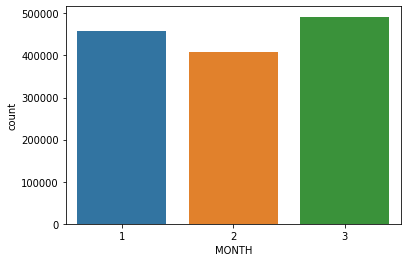

In [11]:
sns.countplot(train.MONTH)

The number of flights is in the range of 400-500 thousand per month so there aren't significant differences in those numbers.

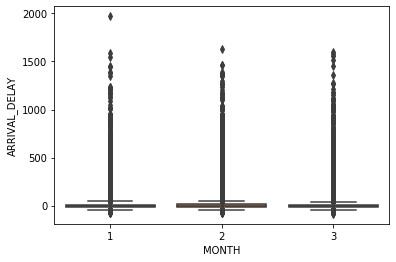

In [12]:
sns.boxplot(train.MONTH, train.ARRIVAL_DELAY)

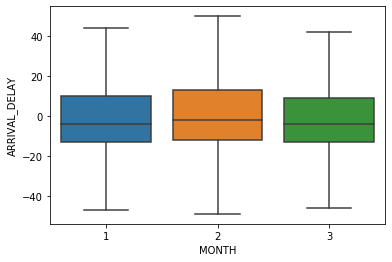

In [13]:
sns.boxplot(train.MONTH, train.ARRIVAL_DELAY, showfliers = False)

Outliers are present in every month. If we get rid of them then it is visible that arrival times in different months are distributed similarly, with small differences. 

Arrival time doesn't seem to depend on month so we should also expect similar values in April.

## DEPARTURE DELAY

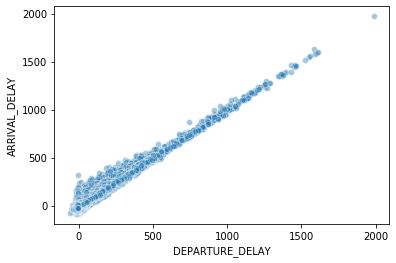

In [14]:
sns.scatterplot(train.DEPARTURE_DELAY, train.ARRIVAL_DELAY, alpha = 0.4)

The correlation between departure and arrival delay seems to be nearly linear.

Departure delay should be clearly the most significant factor in predicting arrival delay. The greatest diversity is visible in the area of the smallest departure delay values, probably due to the fact that the most of flights have a small delay, so the outliers have a biggest chance to occur right then.

We can go further and create a delay reduction variable, being a difference between arrival and departure delay. As a relation between departure and arrival delay is nearly linear, we can make better use of delay reduction than arrival delay in seeking other relations that can affect arrival delay. Arrival delay has many different values and it could be difficult to make predictions based on that. Delay reduction seems to be a reasonable solution because the range of values wouldn't be so broad.

We will look for variables that can improve predicting differences between arrival and departure delay. We will continue visualizations based on both arrival delay and delay reduction.

## DELAY REDUCTION

In [15]:
train['DELAY_REDUCTION'] = train.DEPARTURE_DELAY - train.ARRIVAL_DELAY

In [16]:
describe(train.DELAY_REDUCTION)

count    1356814.00
mean           4.03
std           13.79
min         -330.00
10%          -11.00
25%           -2.00
50%            5.00
75%           12.00
90%           19.00
max           89.00
Name: DELAY_REDUCTION, dtype: float64


It seems that for most observations the delay gets smaller. A positive delay reduction means a reduction of a delay. There also occur some outliers, however not that great as in the case of an arrival delay.

In [17]:
print('% of sooner arrivals:', round(len(train.loc[train.DELAY_REDUCTION > 0, 'DELAY_REDUCTION']) * 100 / len(train),2))

% of sooner arrivals: 66.78


About 67% observations have greater departure delay than arrival delay.

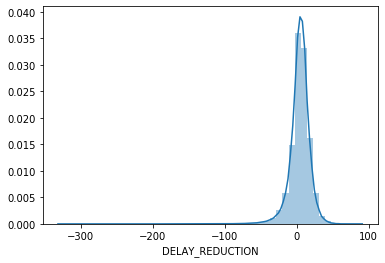

In [18]:
sns.distplot(train.DELAY_REDUCTION)

The data is concentrated in one interval, however there are also some outliers in different areas of the delays' reduction.

We will examine delays' difference regarding different variables. For this purpose we will use a hexbin plot that display a count of occurences of data in different intervals of values. We will use logarithmic scale to enable graph to show all possible data points.
There will be also visible marginal distributions of variables.

Let's now check whether there are any relations between delay reduction and arrival delay.

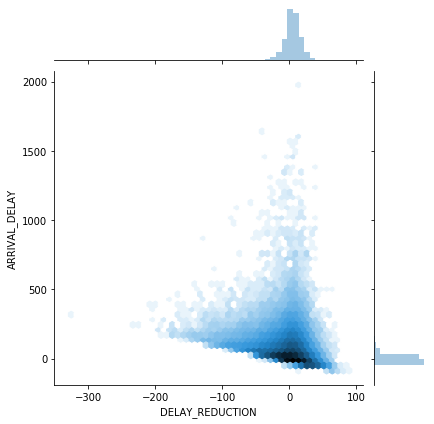

In [19]:
sns.jointplot(train.DELAY_REDUCTION, train.ARRIVAL_DELAY, kind="hex", bins = 'log')

There aren't any visible correlations between delay reduction and arrival delay. Arrival delay's outliers apear in the area of delay reduction with the majority of observations.

It seems that comparing variables to delay reduction instead of arrival delay makes sense. We will try to improve our performance by trying to reduce a deviation between departure and arrival delay. Such deviation doesn't seem to affect arrival delay.

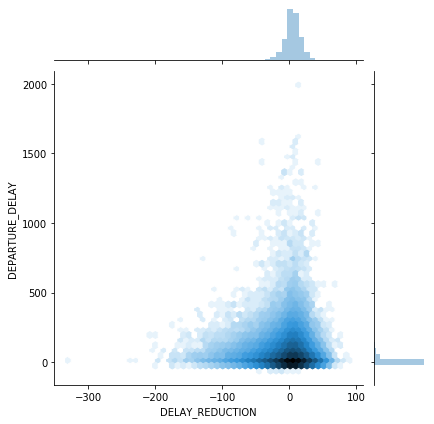

In [20]:
sns.jointplot(train.DELAY_REDUCTION, train.DEPARTURE_DELAY, kind="hex", bins = 'log')

There isn't also any relation between departure delay and delay reduction.

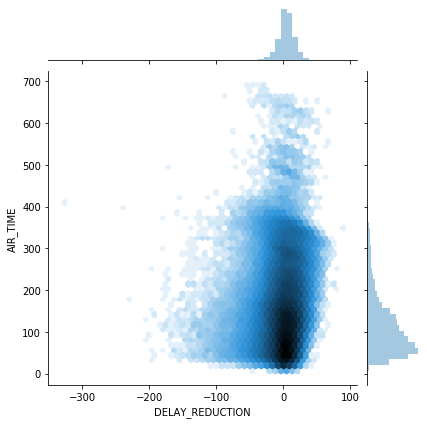

In [21]:
sns.jointplot(train.DELAY_REDUCTION, train.AIR_TIME, kind="hex", bins = 'log')

The data is concentrated in one area of delay (about -20 to 15 minutes). The bigger airtime, the smaller number of data points to the left of the main area of observations. There are also data poins that are much more dispersed than normally. Single data points shouldn't however affect our data so we won't remove outliers for now.

# TAXI IN
Greater taxi in than usual should have an influnce on delay reduction.

In [22]:
describe(train.TAXI_IN)

count    1356814.00
mean           7.46
std            6.08
min            1.00
10%            3.00
25%            4.00
50%            6.00
75%            9.00
90%           13.00
max          202.00
Name: TAXI_IN, dtype: float64


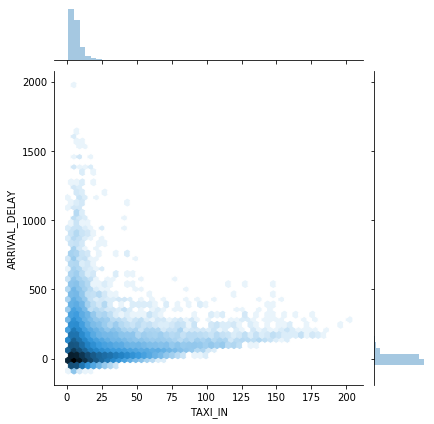

In [23]:
sns.jointplot(train.TAXI_IN, train.ARRIVAL_DELAY, kind="hex", bins = 'log')

Taxi in isn't the most important factor in arrival delay. For the bigger arrival delays its influence is very small.

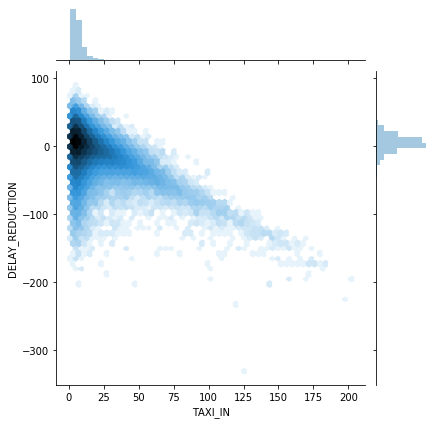

In [24]:
sns.jointplot(train.TAXI_IN, train.DELAY_REDUCTION, kind="hex", bins = 'log')

90% of taxi in values are smaller than 13 minutes. There isn't any relation between taxi in and delay reduction up to that level. The correlation is visible only in taxi in values from about 50 minutes, but such values are very rare.

Let's also examine whether there will be any differences if we compare delay reduction with taxi in difference between particular observation's value and the mean of taxi in value for particular destination airport.

In [25]:
taxi_in_by_dest = train.groupby('DESTINATION_AIRPORT')['TAXI_IN'].mean().rename('TAXI_IN_BY_DEST')
train = train.merge(taxi_in_by_dest, on = 'DESTINATION_AIRPORT', how = 'left')
train['TAXI_IN_DIFF'] = train['TAXI_IN'] - train['TAXI_IN_BY_DEST']

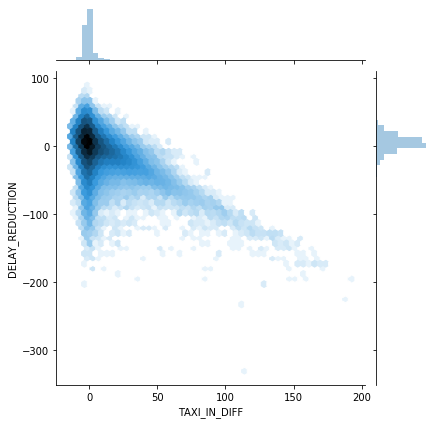

In [26]:
sns.jointplot(train.TAXI_IN_DIFF, train.DELAY_REDUCTION, kind="hex", bins = 'log')

The relation between delay reduction and taxi in difference seems to look almost the same as in the case of taxi in.

## ARRIVAL/DEPARTURE HOUR

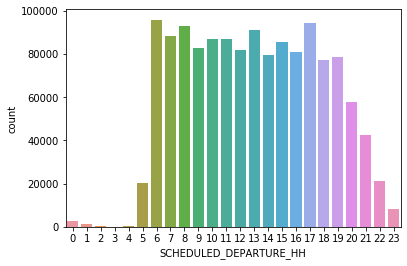

In [27]:
sns.countplot(train.SCHEDULED_DEPARTURE_HH)

The main air traffic occurs for flights with scheduled departure from 6 a.m. to 7 p.m. Then it gradually decreases and from midnight to 4 a.m. there is barely noticeable number of flights.

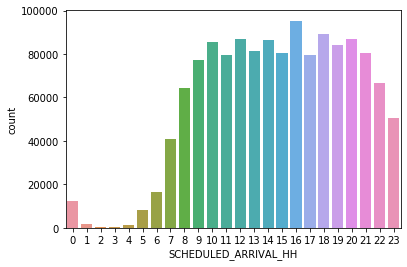

In [28]:
sns.countplot(train.SCHEDULED_ARRIVAL_HH)

The main air traffic occurs for flights with scheduled arrival between 8 a.m. and 11 p.m. Then there is a sudden decrease at midnight and there is then barely any movement from 1 a.m. to 4 a.m. Then the number of flights gradually rises.

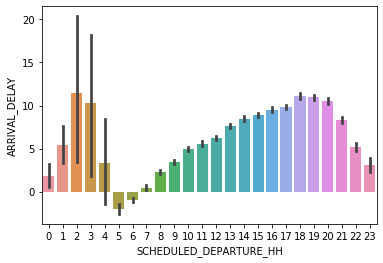

In [29]:
sns.barplot(train.SCHEDULED_DEPARTURE_HH, train.ARRIVAL_DELAY)

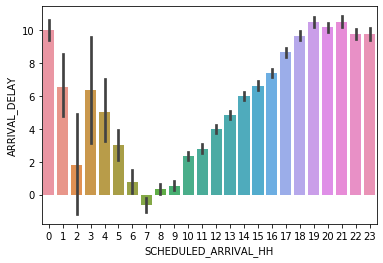

In [30]:
sns.barplot(train.SCHEDULED_ARRIVAL_HH, train.ARRIVAL_DELAY)

Scheduled departure and arrival hours have similar effect on arrival delay. 

Flights that start or end early in the morning are usually ahead of schedule. The arrival delay rises with every hour and it stops increasing at about 7 p.m up to 11 minutes.

In the case of scheduled departure it then decreases faster with every hour up to midnight with about 1 minute departure. From 1 a.m. to 4 a.m. it rises a little and fluctuates up to 4 a.m., probably because of small air trafic in that period.

Scheduled arrival, on the other hand, stays from 7 p.m. to midnight at the same level and then fluctuates up to 6 a.m.

Let's examine next scheduled departure and schedule arrival by delay reduction.

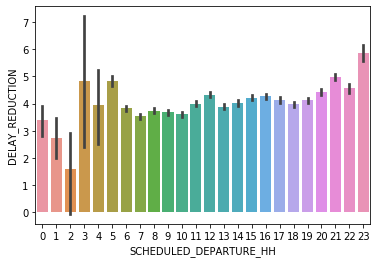

In [31]:
sns.barplot(train.SCHEDULED_DEPARTURE_HH, train.DELAY_REDUCTION)

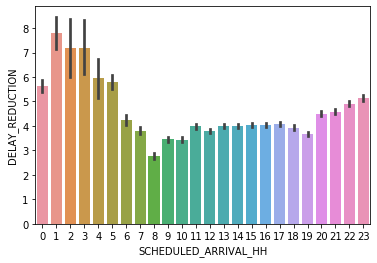

In [32]:
sns.barplot(train.SCHEDULED_ARRIVAL_HH, train.DELAY_REDUCTION)

In the case of delay reduction those variables don't seem to be useful at all. Different hours have a similar impact on delay reduction, except the rarest hours. Maybe for an hour of scheduled departure there can be seen a vague growing trend with a little increase in delay reduction from 7 a.m. to 11 p.m.

## DAY OF WEEK

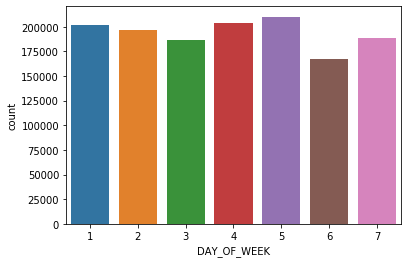

In [33]:
sns.countplot(train.DAY_OF_WEEK)

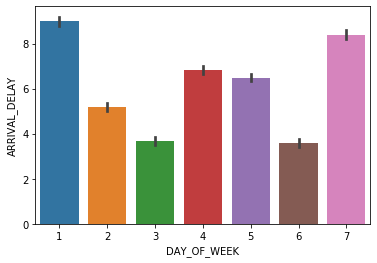

In [34]:
sns.barplot(train.DAY_OF_WEEK, train.ARRIVAL_DELAY)

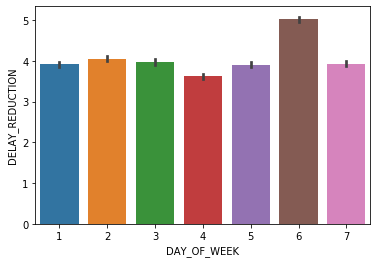

In [35]:
sns.barplot(train.DAY_OF_WEEK, train.DELAY_REDUCTION)

Arrival delays of flights from individual days differ averagely by 2-5 minutes with the highest values on Monday and the lowest on Saturday. Saturdays have also the largest delay reduction but those values differ only by about 2 minutes for different weekdays.

## AIRLINE


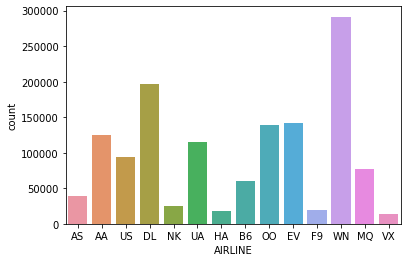

In [36]:
sns.countplot(train.AIRLINE)

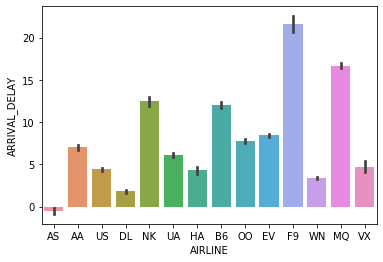

In [37]:
sns.barplot(train.AIRLINE, train.ARRIVAL_DELAY)

It seems that some of the least popular airlines have the biggest delays.

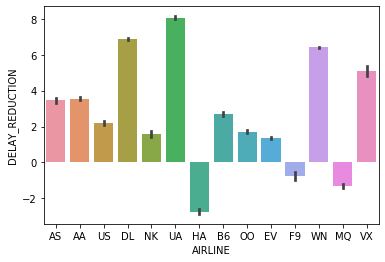

In [38]:
sns.barplot(train.AIRLINE, train.DELAY_REDUCTION)

The most popular airlines seem to have the biggest chance to reduce the delay.

## ORIGIN AIRPORT
We can't visualize all airports so instead of that we will examine only airports with extreme delay values. We will take only 15 airports with the biggest and the smallest mean of arrival delay/delay reduction.

In [39]:
def countplot_n(col, delay_col, n = 15):
    fig, axes = plt.subplots(1,2)
    fig.set_size_inches(14, 4)    
    sns.countplot(col, data = train[train[col].isin(train.groupby(col)[delay_col].mean().nlargest(n).index)], ax = axes[0]).\
            set_title('Count of '+ str(n) + ' ' + col + ' with largest ' + delay_col)
    sns.countplot(col, data = train[train[col].isin(train.groupby(col)[delay_col].mean().nsmallest(n).index)], ax = axes[1]).\
            set_title('Count of '+ str(n) + ' ' + col + ' with smallest ' + delay_col)

In [40]:
def barplot_n(col, delay_col, n = 15):
    #train.groupby(col)[arrival_col].mean()
    #plt.rcParams['figure.figsize'] = [14,4]
    fig, axes = plt.subplots(1,2)
    fig.set_size_inches(14, 4)
    sns.barplot(col, delay_col, 
        data = train[train[col].isin(train.groupby(col)[delay_col].mean().nlargest(n).index)], ax = axes[0]).\
        set_title('Mean of '+ str(n) + ' ' + col + ' with largest ' + delay_col)
    sns.barplot(col, delay_col,
        data = train[train[col].isin(train.groupby(col)[delay_col].mean().nsmallest(n).index)], ax = axes[1]).\
        set_title('Mean of '+ str(n) + ' ' + col + ' with smallest ' + delay_col)

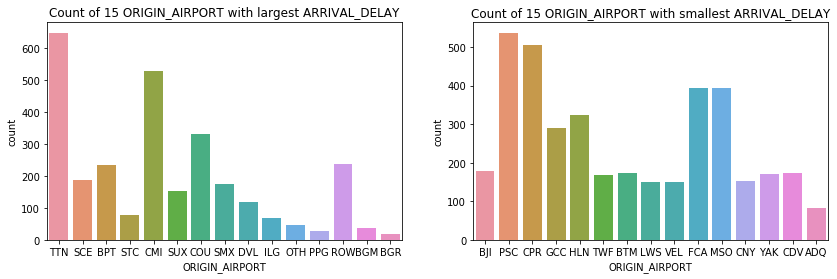

In [41]:
countplot_n('ORIGIN_AIRPORT', 'ARRIVAL_DELAY')

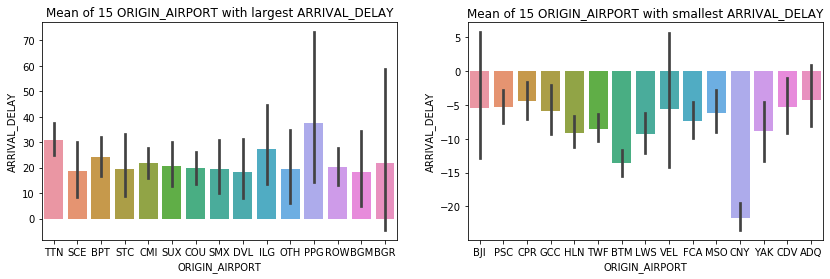

In [42]:
barplot_n('ORIGIN_AIRPORT', 'ARRIVAL_DELAY')

Origin airports can give some advantage in predicting arrival delay. There are a few outliers, both in the largest and the smallest arrival delay values, that are significantly different from other airports. The remaining airports with the highest arrival delay differ by about 30 minutes from the smallest values

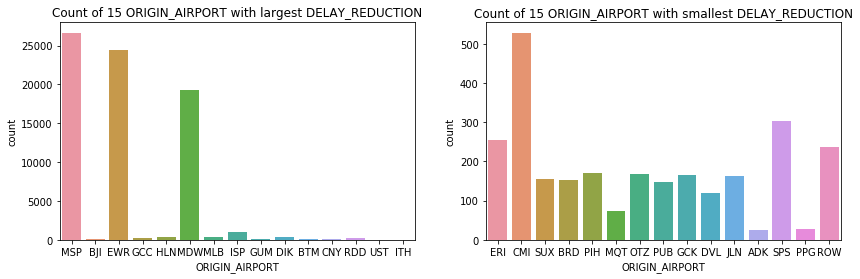

In [43]:
countplot_n('ORIGIN_AIRPORT', 'DELAY_REDUCTION')

As regards origin airports, there are many airports with the largest delay reduction with very small number of observations as well as with very large number. We should be careful to not overfit delay reduction values in those less numerous airports.

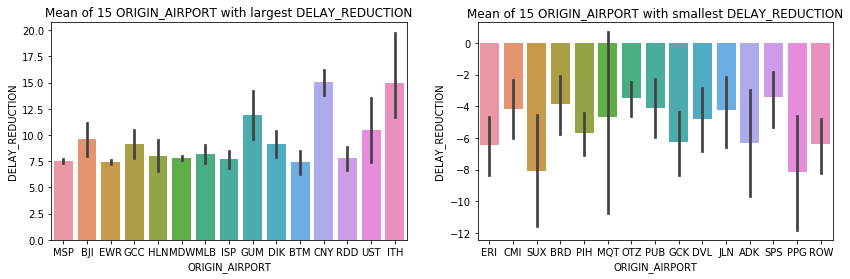

In [44]:
barplot_n('ORIGIN_AIRPORT', 'DELAY_REDUCTION')

There are again a few outliers. The rest of airports with the highest delay reduction values differ slighly less from the smallest values resulting in a difference of about 10 minutes.

## DESTINATION AIRPORT

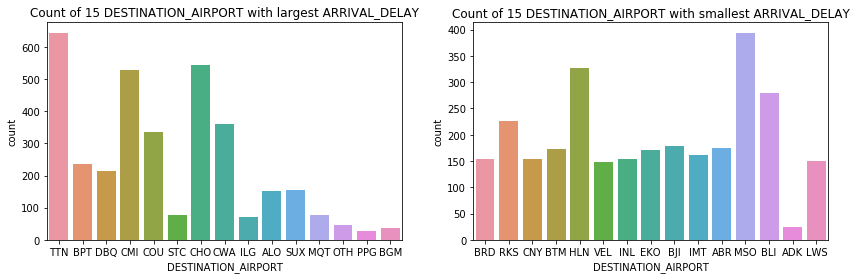

In [45]:
countplot_n('DESTINATION_AIRPORT', 'ARRIVAL_DELAY')

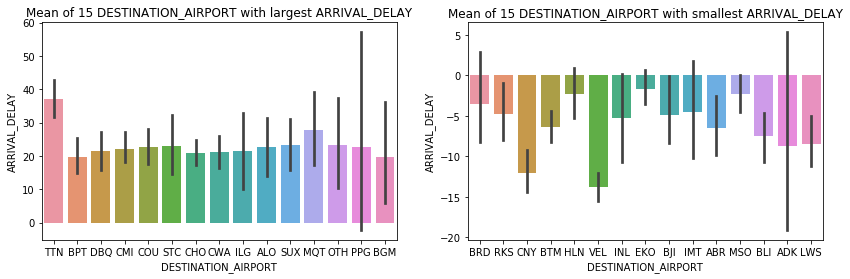

In [46]:
barplot_n('DESTINATION_AIRPORT', 'ARRIVAL_DELAY')

The situation for arrival delay is quite similar to origin airports, even over half of the airports are the same.

The mean values however seems to be a little larger.

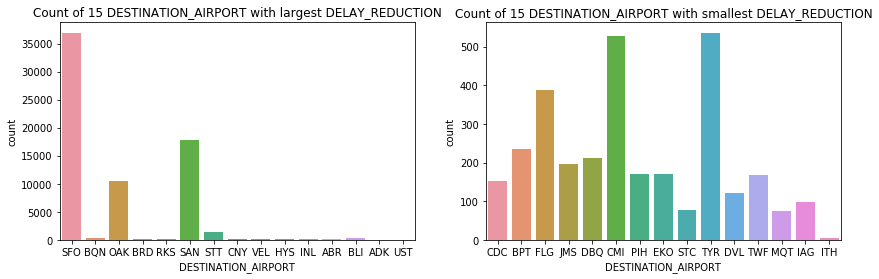

In [47]:
countplot_n('DESTINATION_AIRPORT', 'DELAY_REDUCTION')

As in the origin airports there are many airports with a very small number of occurances for flights with the largest delay reduction. This time however there are hardly any repetitions from origin.

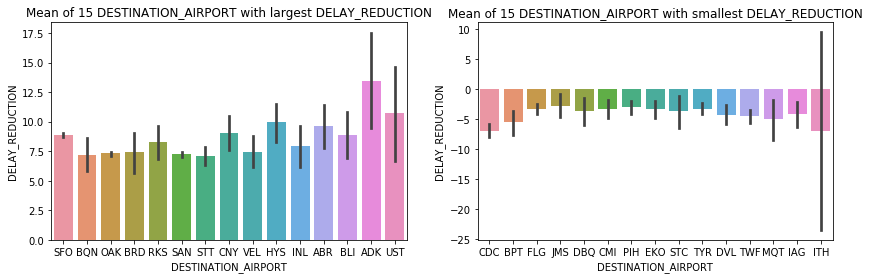

In [48]:
barplot_n('DESTINATION_AIRPORT', 'DELAY_REDUCTION')

The values of delay reduction are on the similar level as in the case of departure (maximum about 7-10 minutes and minimum oscillating around -4 minutes). Airports with the smallest reduction of delay however don't have such clearly defined outliers.

## ROUTE
There are too many routes (over 4500) to visualize them easily on the graph. Instead of that we will examine routes' statistics based on median of a delay. We'll use median instead of mean to not overfit to individual high values that can occur in less popular routes.

In [49]:
describe(train.groupby('ROUTE')['ARRIVAL_DELAY'].median())

count    4297.00
mean       -3.03
std        10.95
min       -35.00
10%       -11.00
25%        -7.00
50%        -4.00
75%         0.00
90%         3.00
max       381.00
Name: ARRIVAL_DELAY, dtype: float64


50% of routes have a median of arrival ahead of schedule in the range from 0 to 7 minutes with a mean of 4 minutes.
If we take 80% typical values the range changes to the interval from -3 to 11 minutes.

In [50]:
describe(train.groupby('ROUTE')['DELAY_REDUCTION'].median())

count    4297.00
mean        5.64
std         5.45
min       -40.00
10%         0.00
25%         2.50
50%         5.00
75%         8.00
90%        12.00
max        33.00
Name: DELAY_REDUCTION, dtype: float64


Delay reduction has very similar results in comparison to arrival delay. The main difference is the 2 times lower standard deviation.

Let's check additionally routes with the highest values of delay reduction.

In [51]:
train.groupby('ROUTE')['DELAY_REDUCTION'].agg(['median', 'count']).nlargest(10, 'median')

,median,count
ROUTE,,
SEA_TPA,33.0,90
MIA_AUS,32.0,27
STL_TTN,31.0,3
ANC_KOA,30.5,26
PIT_SFO,30.0,31
ATL_RAP,26.0,3
GSO_CLT,26.0,1
RDU_PHX,25.5,30
AUS_MIA,25.0,27


We should keep in mind to beware overfitting to extreme values for routes that are very rarely used. 

## ROUTE STATES

In [52]:
describe(train.groupby('ROUTE_STATES')['ARRIVAL_DELAY'].median())

count    1147.00
mean       -3.63
std         7.63
min       -26.50
10%       -10.20
25%        -7.00
50%        -4.00
75%        -1.00
90%         2.00
max       149.00
Name: ARRIVAL_DELAY, dtype: float64


In [53]:
describe(train.groupby('ROUTE_STATES')['DELAY_REDUCTION'].median())

count    1147.00
mean        6.37
std         4.82
min       -24.00
10%         2.00
25%         4.00
50%         6.00
75%         9.00
90%        12.20
max        24.00
Name: DELAY_REDUCTION, dtype: float64


Routes by states provide similar outcomes as routes alone but the results are a little more concentrated. The results are less detailed but are also less exposed to overfitting.

## COORDINATES

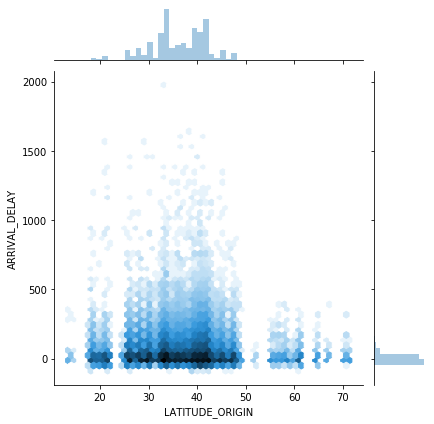

In [54]:
sns.jointplot(train.LATITUDE_ORIGIN, train.ARRIVAL_DELAY, kind = 'hex', bins = 'log')

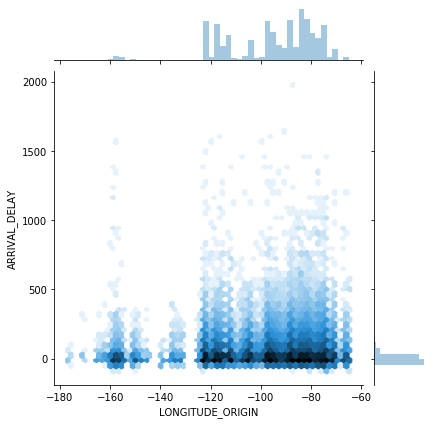

In [55]:
sns.jointplot(train.LONGITUDE_ORIGIN, train.ARRIVAL_DELAY, kind = 'hex', bins = 'log')

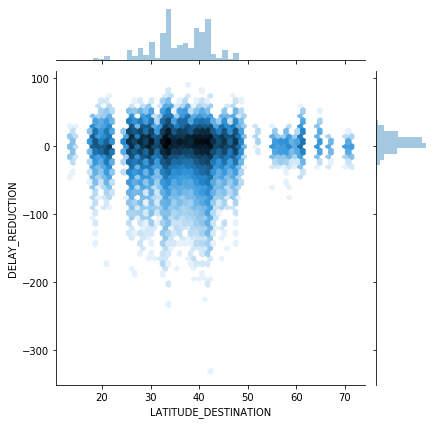

In [56]:
sns.jointplot(train.LATITUDE_DESTINATION, train.DELAY_REDUCTION, kind = 'hex', bins = 'log')

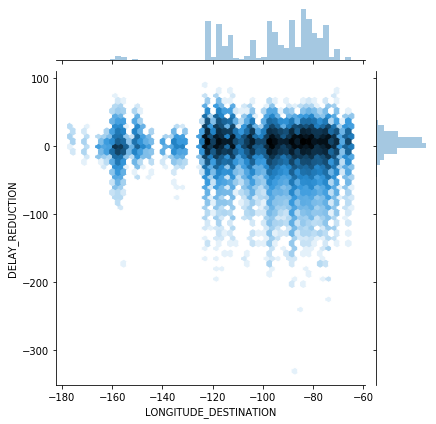

In [57]:
sns.jointplot(train.LONGITUDE_DESTINATION, train.DELAY_REDUCTION, kind = 'hex', bins = 'log')

Longitudes and lattitudes don't seem to have any effect on delay. Outliers occur only in coordinates with the greastest number of flights.

Let's now examine differences of longitudes' origin and destination.

In [58]:
train['LONGITUDE_DIFF'] = train['LONGITUDE_ORIGIN'] - train['LONGITUDE_DESTINATION']
train['LATITUDE_DIFF'] = train['LATITUDE_ORIGIN'] - train['LATITUDE_DESTINATION']

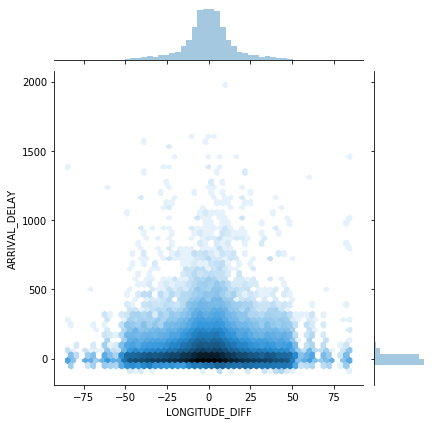

In [59]:
sns.jointplot(train.LONGITUDE_DIFF, train.ARRIVAL_DELAY, kind = 'hex', bins = 'log')

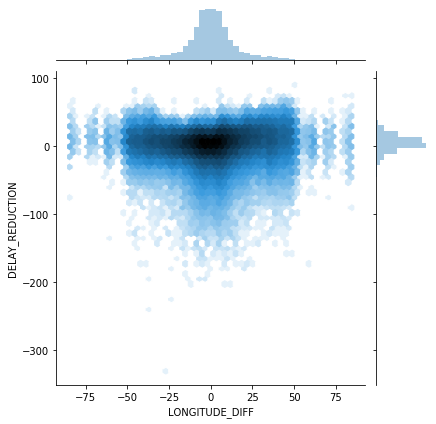

In [60]:
sns.jointplot(train.LONGITUDE_DIFF, train.DELAY_REDUCTION, kind = 'hex', bins = 'log')

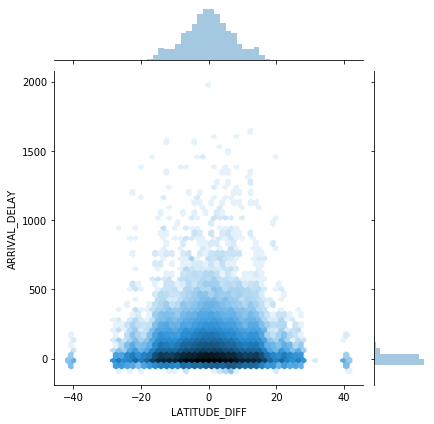

In [61]:
sns.jointplot(train.LATITUDE_DIFF, train.ARRIVAL_DELAY, kind = 'hex', bins = 'log')

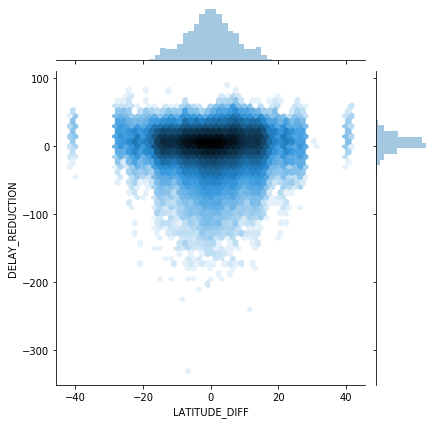

In [62]:
sns.jointplot(train.LATITUDE_DIFF, train.DELAY_REDUCTION, kind = 'hex', bins = 'log')

There isn't any relation at all. The interesting fact is that most of the data lattitudes and longitudes differences oscillate around 0.


## DISTANCE

Let's now see whether a distance, that contain in itself information about both longitudes and latitudes differences, could be a greater predictor.

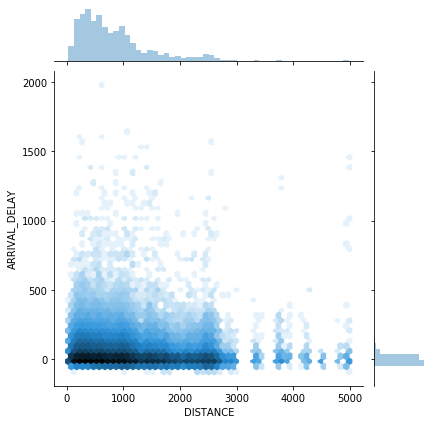

In [63]:
sns.jointplot(train.DISTANCE, train.ARRIVAL_DELAY, kind = 'hex', bins = 'log')

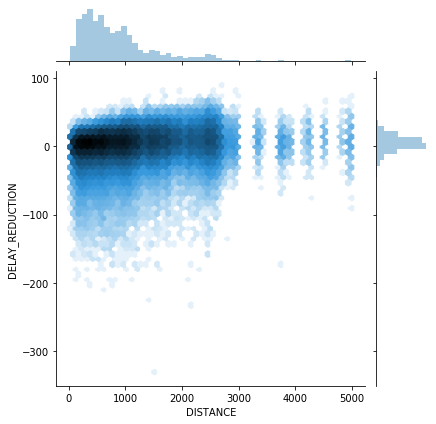

In [64]:
sns.jointplot(train.DISTANCE, train.DELAY_REDUCTION, kind = 'hex', bins = 'log')

There still isn't any clear correlation. There however exist more outliers for a greater distance.

## TYPES OF DELAY

In [65]:
train[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].isna().sum() * 100/ len(train)

AIR_SYSTEM_DELAY       78.878313
SECURITY_DELAY         78.878313
AIRLINE_DELAY          78.878313
LATE_AIRCRAFT_DELAY    78.878313
WEATHER_DELAY          78.878313
dtype: float64

In [66]:
print('Number of rows with existing AIR_SYSTEM_DELAY:', train.AIR_SYSTEM_DELAY.count())

Number of rows with existing AIR_SYSTEM_DELAY: 286582


All variables containing information about type of delay have the same number of missing data. Only about 21% of data have values for those columns.

In [67]:
print('The smallest arrival delay for data with existing AIR_SYSTEM_DELAY:',
      train.loc[~train.AIR_SYSTEM_DELAY.isna(), 'ARRIVAL_DELAY'].min())
print('Number of rows with arrival delay greater than or equal min value of AIR_SYSTEM_DELAY:',
      len(train[(train.ARRIVAL_DELAY >= train.loc[~train.AIR_SYSTEM_DELAY.isna(), 'ARRIVAL_DELAY'].min())]))

The smallest arrival delay for data with existing AIR_SYSTEM_DELAY: 15.0
Number of rows with arrival delay greater than or equal min value of AIR_SYSTEM_DELAY: 286582


It occurs that types of delay appear only for observations with arrival delay greater or equal 15 minutes.

Let's now examine those delay types.

In [68]:
for delay_type in ('AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'):
    train[delay_type + '_IN_TOTAL'] = train[delay_type] / train.ARRIVAL_DELAY
    
train_delays = pd.melt(train.loc[~train.AIR_SYSTEM_DELAY.isna(),
                        ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']])
train_delays = train_delays[train_delays.value > 0]

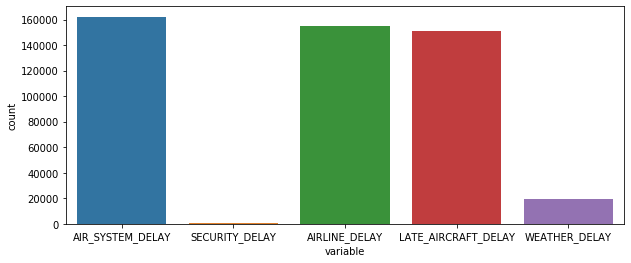

In [69]:
fig, ax = plt.subplots(figsize=(10,4))
sns.countplot(train_delays.variable, ax = ax)

In [70]:
print('Count of SECURITY_DELAY:', len(train_delays[train_delays.variable == 'SECURITY_DELAY']))

Count of SECURITY_DELAY: 790


There is a similar number of flights with air system delay, airline delay and late aircraft delay that have values greater than 0 (about 10 thousand flights).

There are about 8 times less flights with delay caused to some extent by weather (about 20 thousand flights).

Security delay is clearly the rearest type of delay. It occurs only 790 times.

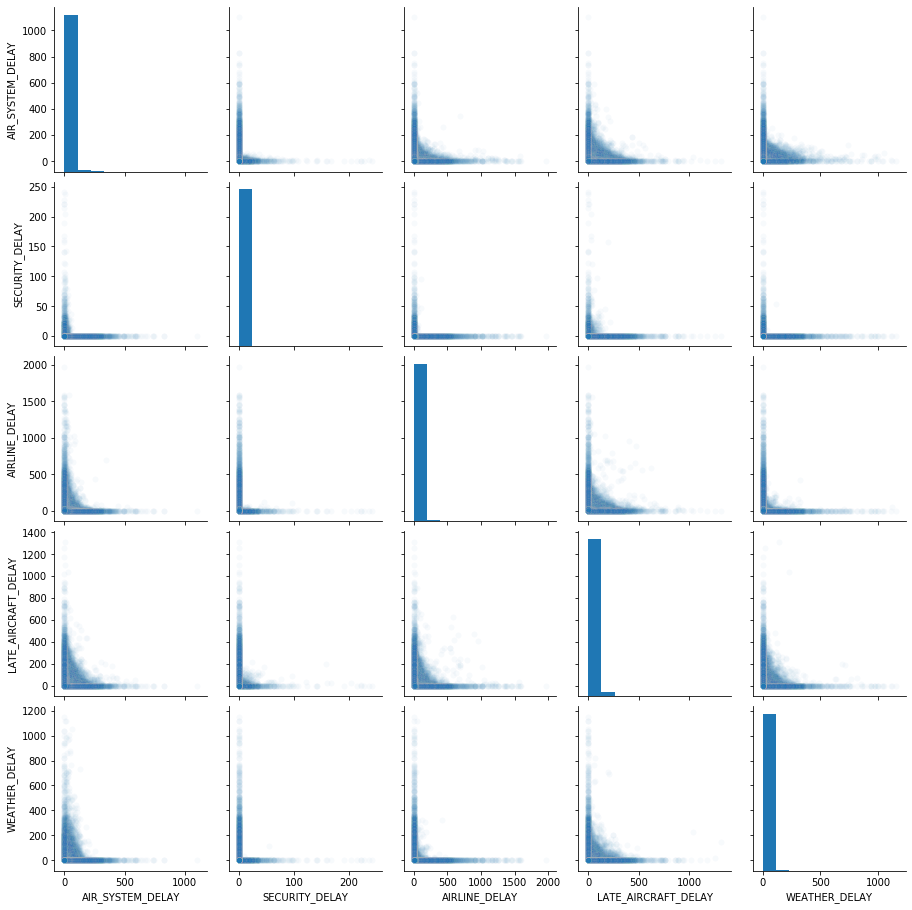

In [71]:
sns.pairplot(data = train[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']],
             plot_kws=dict(alpha=0.03))

It seems that for the vast majority of cases with big delay there is only one type of delay.

Let's now compare to each other particular types of delay in the total delay.

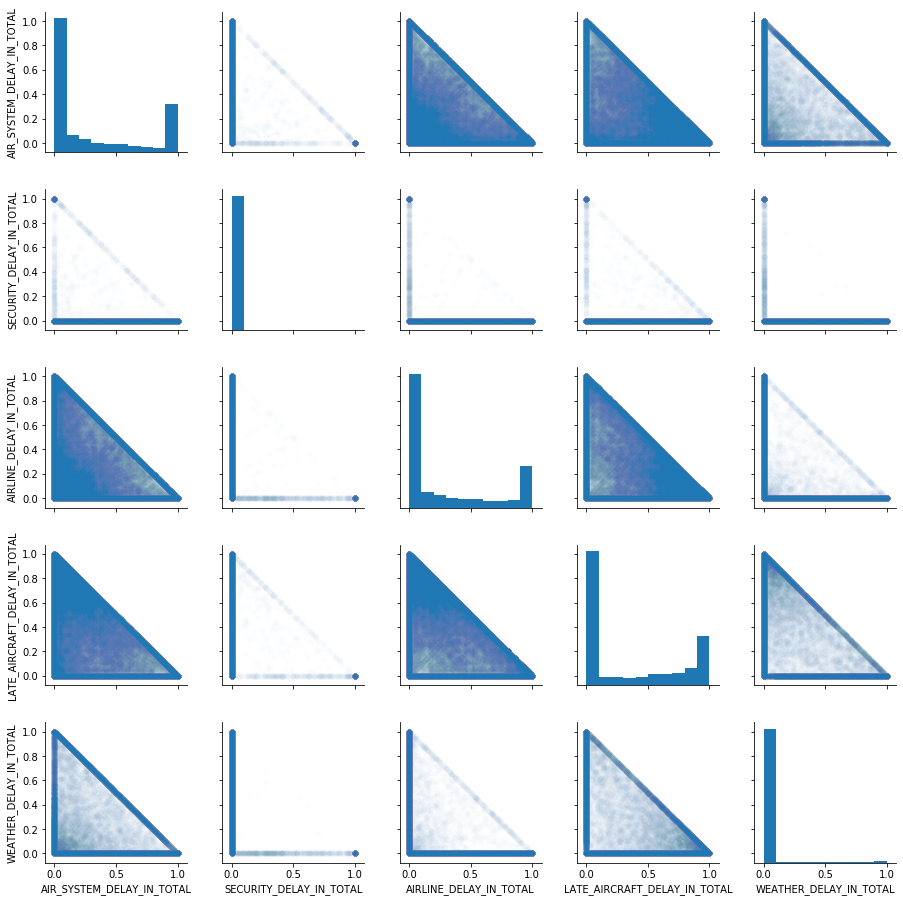

In [72]:
sns.pairplot(data = train[['AIR_SYSTEM_DELAY_IN_TOTAL', 'SECURITY_DELAY_IN_TOTAL', 'AIRLINE_DELAY_IN_TOTAL',
                           'LATE_AIRCRAFT_DELAY_IN_TOTAL', 'WEATHER_DELAY_IN_TOTAL']],
             plot_kws=dict(alpha=0.01))

Air system delay, airline delay and late aircraft delay appear frequently together.

Security delay and weather delay appear usually alone or with only one different delay type.

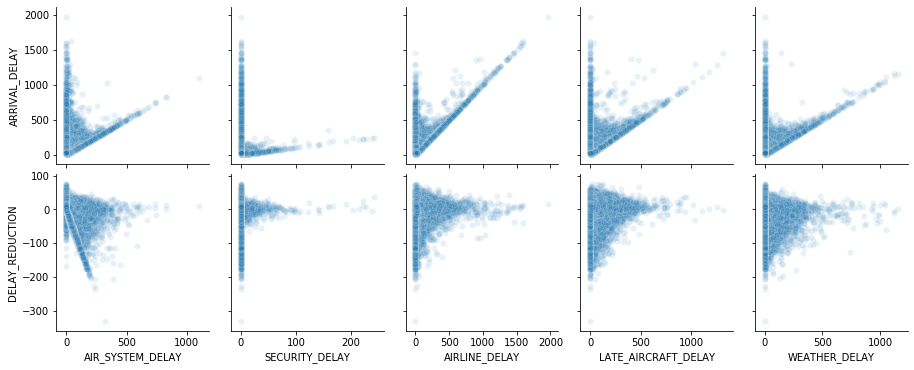

In [73]:
sns.pairplot(y_vars = ['ARRIVAL_DELAY', 'DELAY_REDUCTION'],
            x_vars = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
            data = train[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY',
                          'ARRIVAL_DELAY', 'DELAY_REDUCTION']],
            plot_kws=dict(alpha=0.1))

The biggest delays are caused mainly by airline and late aircraft delay. On the other hand, security delay doesn't constitute for flights with delay larger than about 200 minutes.

Airline delay, late aircraft delay and weather delay have similar influence on delay reduction. Air system delay acts similarly  in the case of delay reduction but it is also the main factor in the delay increase. Security delay seems to have the least impact on delay. 

Type of delays don't seem to be useful in predicting delay reduction. The observations on graph don't show any trends, except air system delay, which mainly follows delay reduction. However, we can obtain information on types of delays only when we already know also other columns, including delay reduction. Aggregation on delay reduction is more profitable than on air system delay, so using this variable doesn't make much sense.

## FREQUENCY OF AIRLINE DELAY BY AIRLINES

In [74]:
airline_delay = pd.DataFrame([train.AIRLINE.value_counts(), train.loc[train.AIRLINE_DELAY > 0, 'AIRLINE'].value_counts()]).T
airline_delay.columns = ['AIRLINE_FLIGHTS', 'AIRLINE_DELAY']
airline_delay['AIRLINE_DELAY_PERCENTAGE'] = airline_delay.AIRLINE_DELAY * 100 / airline_delay.AIRLINE_FLIGHTS
airline_delay

,AIRLINE_FLIGHTS,AIRLINE_DELAY,AIRLINE_DELAY_PERCENTAGE
WN,291458,35258,12.097112
DL,196253,17049,8.687256
EV,141964,16260,11.453608
OO,138539,10723,7.740059
AA,124694,14421,11.565111
UA,115406,15875,13.755784
US,94634,10463,11.056280
MQ,76622,10985,14.336614
B6,60892,11289,18.539381
AS,39375,2040,5.180952


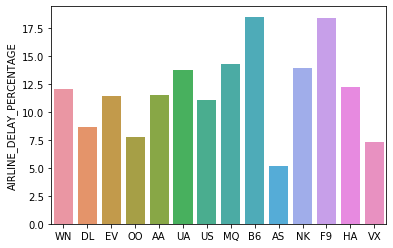

In [75]:
sns.barplot(airline_delay.index, airline_delay.AIRLINE_DELAY_PERCENTAGE)

The graph presents a percentage of flights with at least 15 minutes of delay caused by airlines for particular airlines.
There are 4 airlines with arrival delay below 8%. Then for another 6 airlines the percentage reaches from 10 to 12%. There are also 4 airlines with airline delay share in the range of 14 to 17%.

## TAIL NUMBER

In [76]:
describe(train.groupby('TAIL_NUMBER')['ARRIVAL_DELAY'].median())

count    4557.00
mean       -2.28
std        10.20
min       -26.00
10%        -7.00
25%        -5.00
50%        -3.50
75%        -1.00
90%         2.00
max       272.00
Name: ARRIVAL_DELAY, dtype: float64


In [77]:
describe(train.groupby('TAIL_NUMBER')['DELAY_REDUCTION'].median())

count    4557.00
mean        5.54
std         3.54
min       -40.00
10%         2.00
25%         3.00
50%         5.00
75%         8.00
90%         9.00
max        47.00
Name: DELAY_REDUCTION, dtype: float64


There don't seem to be any significant differences in delay reduction due to the tail number of the flight.

## FLIGHT NUMBER

In [78]:
train.FLIGHT_NUMBER.head()

0      98
1    2336
2     840
3     258
4     135
Name: FLIGHT_NUMBER, dtype: int64

In [79]:
print('Number of unique FLIGHT_NUMBER:',train.FLIGHT_NUMBER.nunique())

Number of unique FLIGHT_NUMBER: 6541


Flight number contains only the digits. However, flight number consists usually of an airline identificator and digits.

In [80]:
train.loc[train.FLIGHT_NUMBER == 98, ['FLIGHT_NUMBER', 'AIRLINE', 'ROUTE']].head()

,FLIGHT_NUMBER,AIRLINE,ROUTE
0,98,AS,ANC_SEA
13442,98,B6,DEN_JFK
13465,98,AS,ANC_SEA
19997,98,DL,DEN_DTW
29897,98,B6,DEN_JFK


As we can see the same flight number can be assigned to different airlines with different routes, which isn't very informative.
Let's change flight numbers to include both the particular airline and digits.

In [81]:
train['FLIGHT_NUMBER'] = train.AIRLINE + train.FLIGHT_NUMBER.astype('str')

In [82]:
train.loc[train.FLIGHT_NUMBER == 'US840', ['FLIGHT_NUMBER', 'AIRLINE', 'ROUTE', 'SCHEDULED_DEPARTURE']].head(10)

,FLIGHT_NUMBER,AIRLINE,ROUTE,SCHEDULED_DEPARTURE
2,US840,US,SFO_CLT,2015-01-01 00:20:00
13471,US840,US,SFO_CLT,2015-01-02 00:20:00
29924,US840,US,SFO_CLT,2015-01-03 00:20:00
44979,US840,US,SFO_CLT,2015-01-04 00:20:00
60862,US840,US,SFO_CLT,2015-01-05 00:20:00
78069,US840,US,BWI_CLT,2015-01-06 06:40:00
138925,US840,US,RDU_CLT,2015-01-10 07:05:00
150509,US840,US,BWI_CLT,2015-01-11 06:40:00
180643,US840,US,BWI_CLT,2015-01-13 06:40:00
242964,US840,US,RDU_CLT,2015-01-17 07:05:00


It occurs however that particular flight number can indicate different routes. For example for flight number US840 the flight can start in different airports.

In [83]:
train.loc[train.FLIGHT_NUMBER == 'NK612', ['FLIGHT_NUMBER', 'AIRLINE', 'ROUTE', 'SCHEDULED_DEPARTURE']].head(10)

,FLIGHT_NUMBER,AIRLINE,ROUTE,SCHEDULED_DEPARTURE
6,NK612,NK,LAS_MSP,2015-01-01 00:25:00
458,NK612,NK,MSP_ORD,2015-01-01 06:16:00
13475,NK612,NK,LAS_MSP,2015-01-02 00:25:00
14401,NK612,NK,MSP_ORD,2015-01-02 06:16:00
29928,NK612,NK,LAS_MSP,2015-01-03 00:25:00
30777,NK612,NK,MSP_ORD,2015-01-03 06:16:00
44997,NK612,NK,LAS_MSP,2015-01-04 00:25:00
45830,NK612,NK,MSP_ORD,2015-01-04 06:16:00
60866,NK612,NK,LAS_MSP,2015-01-05 00:25:00
61789,NK612,NK,MSP_ORD,2015-01-05 06:17:00


There are also cases of direct flights with at least one stop which is in our data treated as the next flight but with the same flight number. 
When we are only interested in particular route of a flight, we should take into consideration flight number grouped by a route.

In [84]:
train['FLIGHT_NUMBER_ROUTE'] = train.AIRLINE + train.FLIGHT_NUMBER.astype('str') + '_' + train.ROUTE

In [85]:
train.FLIGHT_NUMBER_ROUTE.nunique()

80965

There are over 80,000 routes for different flight numbers.

Let's examine the median values of delay grouped by flight number with distinct routes.

In [86]:
describe(train.groupby('FLIGHT_NUMBER_ROUTE')['ARRIVAL_DELAY'].median())

count    80965.00
mean         2.40
std         26.65
min        -67.00
10%        -16.00
25%         -9.50
50%         -3.00
75%          6.00
90%         23.00
max        863.00
Name: ARRIVAL_DELAY, dtype: float64


In [87]:
describe(train.groupby('FLIGHT_NUMBER_ROUTE')['DELAY_REDUCTION'].median())

count    80965.00
mean         5.73
std          9.88
min       -198.00
10%         -4.00
25%          1.00
50%          6.00
75%         11.00
90%         17.00
max         66.00
Name: DELAY_REDUCTION, dtype: float64


As we can see the values seem to be quite diversified. It can result however from many distinct values for the variable.

Specific flights however could be a great variable for predicting delay reduction.